In [11]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time
import os
from skimage.metrics import structural_similarity as SSIM


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def SegtoCon_DMS (seg):
    rows, cols = np.shape(seg)
    cont = np.zeros_like(seg)
    y = np.zeros((rows, cols, 2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))), axis = 1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))), axis = 0) / 2.

    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i, j, 0]) > 0 or np.abs(y[i, j, 1]) > 0:
                cont[i, j] = 1
    #                 im[i,j,:]=0
    return cont


def SegtoCon_DMS (seg):
    rows, cols = np.shape(seg)
    cont = np.zeros_like(seg)
    y = np.zeros((rows, cols, 2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))), axis = 1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))), axis = 0) / 2.

    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i, j, 0]) > 0 or np.abs(y[i, j, 1]) > 0:
                cont[i, j] = 1
    #                 im[i,j,:]=0
    return cont



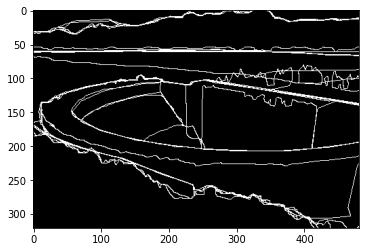

Objective: SSIM


100%|█████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.93it/s]


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [18]:

valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
folder_path= "../../../BSDS500/data/images/train/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:

        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        x = np.array(Image.open(image_path))/255.
        r,l,_ = np.shape(x)
        delta= 0.05
        z = x+ delta*np.random.normal(0,1,x.shape)

        edge_file_path = "../../../BSDS500/data/groundTruth/train/"+image_name+".mat"
        mat_file = scipy.io.loadmat(edge_file_path)

        cont = np.zeros((r, l))
        for v in range(0, 4):
            seg = mat_file['groundTruth'][0, v][0, 0][0]
            cont += SegtoCon_DMS(seg)
        cont = np.where(cont > 0, 1, 0)

        #         plt.figure()
#         plt.imshow(x)
#         plt.show()
#         plt.figure()
#         plt.imshow(z)
#         plt.show()
        plt.figure()
        plt.imshow(cont,'gray')
        plt.show()
#         plt.figure()
#         plt.hist(cont.flatten())
#         plt.show()
        tab_SSIM_out,tab_coord_max_SSIM_out,tab_SSIM_max,out1,out0= golden_section_map(z,x,cont,bmax=3,bmin=-1,lmax=2,lmin=-3,scale_type='10',
                       grid_size=5,max_round=4,objective='SSIM',maxiter=100,stop_crit=1e-4,
                                method='SLPAM',norm_type='l1',eps=0.2,eps_AT_min=0.06,A=np.ones((r,l)))
#         scipy.io.savemat("../../../../Documents/dataset/BSDS500/data/param_dist_SSIM/train/"+image_name+".mat",dict(tab_SSIM_out=tab_SSIM_out,tab_coord_max_SSIM_out=tab_coord_max_SSIM_out,tab_SSIM_max=tab_SSIM_max,out1=out1,out0=out0))
        scipy.io.savemat("../../dataset/BSDS500/data/param_dist_SSIM_l1/train/"+image_name+".mat",dict(tab_SSIM_out=tab_SSIM_out,tab_coord_max_SSIM_out=tab_coord_max_SSIM_out,tab_SSIM_max=tab_SSIM_max,out1=out1,out0=out0))
        cont_thres = np.ones_like(out0)*(out0>0)
#
        cont_thres = np.clip(cont_thres[:,:,0]+cont_thres[:,:,1],0,1)
        plt.figure()
        plt.imshow(out1)
        plt.show()
        plt.figure()
        plt.imshow(cont_thres,'gray')
        plt.show()
        idim += 1
#         if idim ==1:
#             break


